In [1]:
from practical_part import *

In [2]:
schemes = {'C': [0.0, 0.3333333333333333, 0.6666666666666666, 0.0],
           'Minimum Viscosity': [-0.25, 0.583, 0.917, -0.25]}

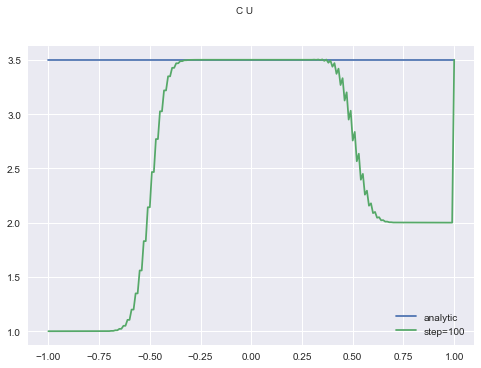

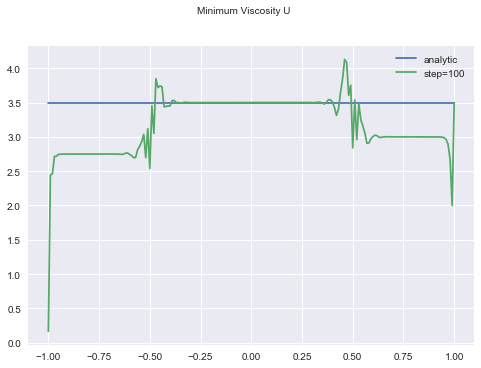

In [3]:
for item in schemes.items():
    solve(item)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
rho_0 = .25
c_0 = 2
u_l = 1
u_r = 0
P_l = 5
P_r = 2

In [4]:
h = .01
cfl = .5
tau = cfl * h / c_0
n_t = 100
n_x = 201
X = (n_x - 1) * h

In [5]:
def get_Y(u, P):
    return u + P / (rho_0 * c_0)


def get_Z(u, P):
    return u - P / (rho_0 * c_0)


def get_u(Y, Z):
    return (Y + Z) / 2


def get_P(Y, Z):
    return rho_0 * c_0 * (Y - Z) / 2

In [9]:
grid = np.linspace(-X / 2, X, n_x)

u0 = np.zeros((n_x,))
u0[grid <= 0] = u_l
u0[grid > 0] = u_r

P0 = np.zeros_like(u0)
P0[grid <= 0] = P_l
P0[grid > 0] = P_r

Y = np.zeros((n_t, n_x))
Z = np.zeros_like(Y)

Y[0] = Y[1] = get_Y(u0, P0)
Z[0] = Z[1] = get_Z(u0, P0)

In [10]:
Y[:, :2] = Y[0, :2]
Y[:, -1] = Y[0, -1]
Z[:, 0] = Z[0, 0]
Z[:, -2:] = Z[:, -2:]

In [11]:
def iteration_Y(Y, n, m, coefs):
    return (coefs[0] * Y[n, m - 1]
                   + coefs[1] * Y[n, m + 1]
                   + coefs[2] * Y[n - 1, m]
                   + coefs[3] * Y[n - 1, m - 2])

def iteration_Z(Z, n, m, coefs):
    return (coefs[0] * Z[n, m + 1]
                   + coefs[1] * Z[n, m - 1]
                   + coefs[2] * Z[n - 1, m]
                   + coefs[3] * Z[n - 1, m + 2])

In [18]:
def solve(coefs, title=''):
    for n in range(1, n_t - 1):

        for m in range(2, n_x - 1):
            Y[n + 1, m] = iteration_Y(Y, n, m, coefs)

        for m in range(1, n_x - 2):
            Z[n + 1, m] = iteration_Z(Z, n, m, coefs)

    plot(title)

In [20]:
def get_analytic():
    t = tau * n_t
    u = np.ndarray(grid.shape)
    u[:] = (u_l + u_r) / 2 - (P_r - P_l) / (2 * rho_0 * c_0)
    u[grid <= -c_0 * t] = u_l
    u[grid > c_0 * t] = u_r

    P = np.ndarray(grid.shape)
    P[:] = (P_l + P_r) / 2 - rho_0 * c_0 * (u_r - u_l) / 2
    P[grid <= -c_0 * t] = P_l
    P[grid > c_0 * t] = P_r
    return u, P

In [31]:
def plot(title):
    mpl.style.use('seaborn')
    u, P = get_u(Y, Z), get_P(Y, Z)
    fig = plt.figure(figsize=(6, 8))
    fig.suptitle(title)

    u_an, P_an = get_analytic()

    ax1 = fig.add_subplot(211)
    ax1.plot(grid, u[-1], label='numeric')
    ax1.plot(grid, u_an, label='analytic')
    ax1.set_title('u')
    ax1.legend()

    ax2 = fig.add_subplot(212)
    ax2.plot(grid, P[-1], label='numeric')
    ax2.plot(grid, P_an, label='analytic')
    ax2.set_title('P')
    ax2.legend()

    plt.show()

In [32]:
schemes = {'C': [2/3, 0, 1/3, 0],
           'Minimum Viscosity': [5/6, -0.3, 2/3,  -0.2]}

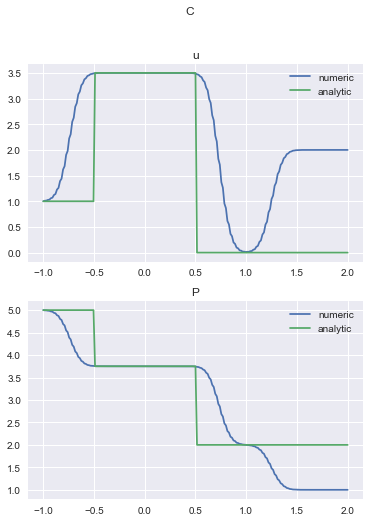

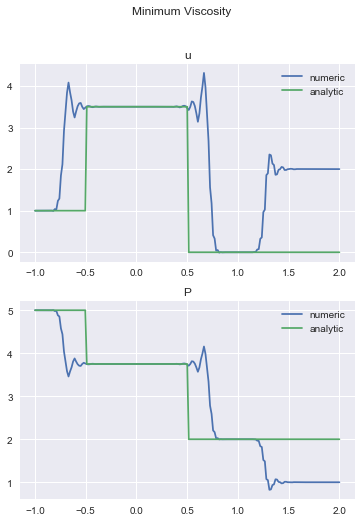

In [33]:
for key in schemes.keys():
    solve(schemes[key], key)